SimpliLearn Deep Learning Project 

Name = Maurya Vijayaramachandran 

Simplilearn email = maurya.mvr@gmail.com 


Import the libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Get the dataset

In [ ]:
!pip install opendatasets
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mauryav
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:01<00:00, 149MB/s]


Analyze the dataset 

In [ ]:
cat10 = cv2.imread('/content/cat-and-dog/training_set/training_set/cats/cat.10.jpg')
cat10 = cv2.cvtColor(cat10,cv2.COLOR_BGR2RGB)

In [ ]:
type(cat10)

numpy.ndarray

In [ ]:
cat10.shape

(499, 489, 3)

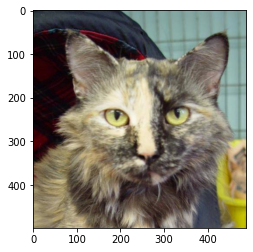

In [ ]:
plt.imshow(cat10)

In [ ]:
dog10 = cv2.imread('/content/cat-and-dog/training_set/training_set/dogs/dog.10.jpg')
dog10 = cv2.cvtColor(dog10,cv2.COLOR_BGR2RGB)

In [ ]:
dog10.shape

(292, 269, 3)

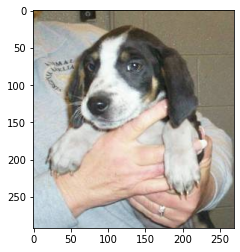

In [ ]:
plt.imshow(dog10)

Generate image as tensors

In [ ]:
"""Configure an ImageDataGenerator for real-time data augmentation.

Args:
    rotation_range (int): Range of degrees for random rotations of the image.
    width_shift_range (float): Maximum fraction of total width to shift the image horizontally.
    height_shift_range (float): Maximum fraction of total height to shift the image vertically.
    rescale (float): Scaling factor for the image data, normalizing the pixel values between 0 and 1.
    shear_range (float): Maximum fraction for shearing the image, cutting away parts of the image.
    zoom_range (float): Maximum fraction for zooming in the image.
    horizontal_flip (bool): Flag indicating whether to allow horizontal flipping of the image.
    fill_mode (str): Method for filling in missing pixels in the image.

Returns:
    An ImageDataGenerator object configured with the specified augmentation settings.
"""

img_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Plot the images 

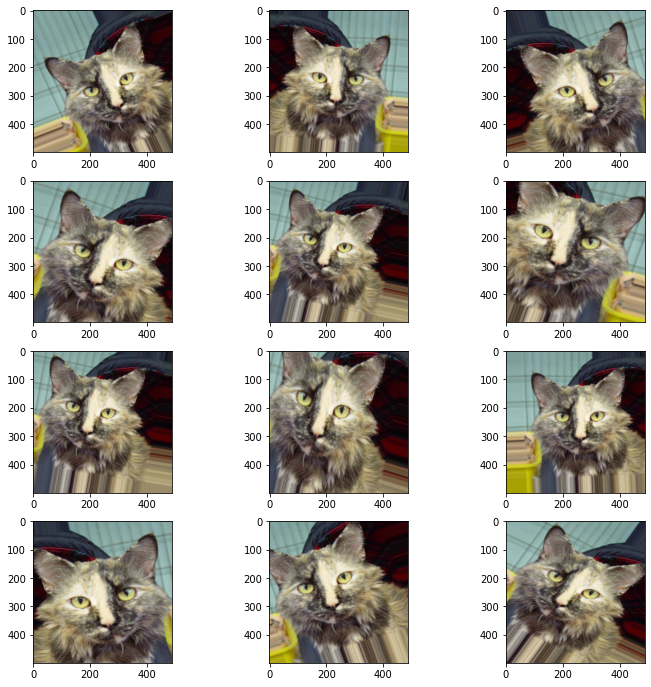

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    plt.imshow(img_gen.random_transform(cat10))
plt.show()

Specify the image shape and channels

1. channels = 3 for rgb

In [ ]:
image_shape = (150,150,3)

Build the model

In [ ]:
"""Create a convolutional neural network model for binary image classification.

Returns:
    A Sequential model object for image classification with convolutional layers, pooling layers, and a dense output layer.
"""

# Conv2D layers perform convolution operations on the input image to extract features.
# MaxPooling2D layers downsample the feature maps from the convolution layers.
# The Flatten layer converts the pooled feature maps into a 1D array for input to the dense layer.

# The Dense layer is a fully connected layer that maps the input features to the output.
# The Activation layer applies a non-linear activation function to the output of the dense layer.
# The Dropout layer helps prevent overfitting by randomly dropping out neurons during training.

# The final Dense layer has one output neuron, representing the binary classification (cat or dog).
# The sigmoid activation function produces a probability output in the range [0, 1].
# The binary_crossentropy loss function is used for binary classification.
# The Adam optimizer is used for training the model.
# The accuracy metric is used to evaluate the performance of the model.

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Generate train and test data 

In [ ]:
batch_size = 64

train_image_gen = img_gen.flow_from_directory('/content/cat-and-dog/training_set/training_set',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_image_gen = img_gen.flow_from_directory('/content/cat-and-dog/test_set/test_set',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2023 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Train the model

In [ ]:
"""Train a model on image data generated in real-time using data augmentation.

Args:
    generator (DirectoryIterator): A generator object that generates batches of augmented image data for training.
    epochs (int): The number of times to iterate over the entire training dataset.
    steps_per_epoch (int): The number of batches to use in each epoch of training.
    validation_data (DirectoryIterator): A generator object that generates batches of augmented image data for validation during training.
    validation_steps (int): The number of batches to use for validation at the end of each epoch.

Returns:
    A History object containing information on the loss and accuracy of the model during training.
"""
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 75s 499ms/step - loss: 0.6992 - acc: 0.4967 - val_loss: 0.6930 - val_acc: 0.5002
Epoch 2/100
150/150 [==============================] - 53s 354ms/step - loss: 0.6912 - acc: 0.5272 - val_loss: 0.6734 - val_acc: 0.5354
Epoch 3/100
150/150 [==============================] - 54s 361ms/step - loss: 0.6820 - acc: 0.5479 - val_loss: 0.6787 - val_acc: 0.5821
Epoch 4/100
150/150 [==============================] - 54s 359ms/step - loss: 0.6728 - acc: 0.5875 - val_loss: 0.6579 - val_acc: 0.5937
Epoch 5/100
150/150 [==============================] - 54s 357ms/step - loss: 0.6781 - acc: 0.5500 - val_loss: 0.6864 - val_acc: 0.5324
Epoch 6/100
150/150 [==============================] - 53s 350ms/step - loss: 0.6716 - acc: 0.5704 - val_loss: 0.6364 - val_acc: 0.6170
Epoch 7/100
150/150 [==============================] - 52s 347ms/step - loss: 0.6632 - acc: 0.6221 - val_loss: 0.6631 - val_acc: 0.5498
Epoch 8/100
150/150 [===========================

save the model

In [ ]:
model.save("catsvsdog.h5")

In [ ]:
results.history['acc']

[0.49666666666666665, 0.5286491008133432, 0.5479166666666667, 0.5875, 0.55, 0.5704166666666667, 0.6220833333333333, 0.6058333333333333, 0.6029166666666667, 0.6333333333333333, 0.6354166666666666, 0.6616666666666666, 0.6591666666666667, 0.6587202007777518, 0.67, 0.665, 0.6933333333333334, 0.6800501882556291, 0.6779166666666666, 0.7020833333333333, 0.6916666666666667, 0.6904166666666667, 0.7016666666666667, 0.7254166666666667, 0.72125, 0.7075, 0.745, 0.7029166666666666, 0.7329166666666667, 0.7168548725130965, 0.7354166666666667, 0.7529166666666667, 0.7383333333333333, 0.7483333333333333, 0.7420833333333333, 0.72625, 0.7454166666666666, 0.7529166666666667, 0.7590966123210392, 0.7720618988619046, 0.7566666666666667, 0.7458333333333333, 0.7570833333333333, 0.7579166666666667, 0.7520833333333333, 0.7629166666666667, 0.7670833333333333, 0.7691342534504392, 0.7875, 0.7845833333333333, 0.8, 0.7695833333333333, 0.7829166666666667, 0.7754166666666666, 0.78625, 0.7925, 0.7883333333333333, 0.77125,